In [ ]:
#The code in this document is created for the purpose of analysing the data created in my power usage experiment
#the data should show if any specific algorithm used pulls more wattage from the power supply at any given time
# the required dependencies are pandas, numpy and matplotlib
#the data from this experiment should show me how much power can be saved/ wasted based on different hyperparameters
#and reward functions used.
#the initial experiment was training these environments and running loops that randomly change the algorithm used and
#the amount of episodes ran for. The algorithm used, the time taken, the amount of episodes, and the wattage at any given point (however recorded at the end)
#have been recorded to a csv file and ran here.
#the power_consumption recorded is not the same thing as power used for the experiment. This would need to be 
#multiplied by the time taken to get an "accurate" account of the power that was used for the experiment
#Power = Wattage * Time
#we can have the result be in joules or watt hours. kwh is more commonly used for measuring electricity usage however
#but this might be more for total household usage

PPO: 1897.8539931818182
A2C: 1732.575941513761
DQN: 1704.3960071839085


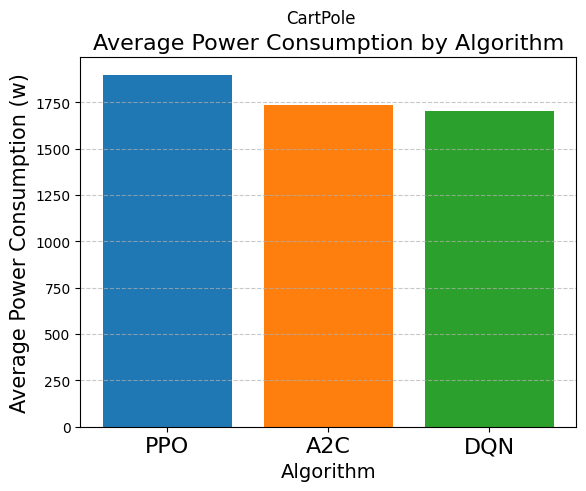

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("TESTING AGAIN CARTPOLE POWER EXPERIMENT.csv")
df['power_consumption'] = df['power_consumption'].replace(',', ' ')

# These 3 lines will separate all the rows where the algorithm name is different so that they can have their 
#mean scores calculated separately
ppo_rows = df[df["algorithm.__name__"] == "PPO"]
a2c_rows = df[df["algorithm.__name__"] == "A2C"]
dqn_rows = df[df["algorithm.__name__"] == "DQN"]

mean_power_consumption_ppo = ppo_rows["power_consumption"].mean()
mean_power_consumption_a2c = a2c_rows["power_consumption"].mean()
mean_power_consumption_dqn = dqn_rows["power_consumption"].mean()

print("PPO:", mean_power_consumption_ppo)
print("A2C:", mean_power_consumption_a2c)
print("DQN:", mean_power_consumption_dqn)

labels = ['PPO', 'A2C', 'DQN']
values = [mean_power_consumption_ppo, mean_power_consumption_a2c, mean_power_consumption_dqn]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # this should set custom colours to each chart to differentiate
fig, ax = plt.subplots()
ax.bar(labels, values, color=colors)
ax.set_title('Average Power Consumption by Algorithm', fontsize=16)
ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Average Power Consumption (w)', fontsize=15)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='x', labelsize=16)
fig.text(0.5, 0.98, 'CartPole', fontsize=12, ha='center', va='top')

plt.savefig('CartPole_average_power_plot.png')

plt.show()


PPO: 1907.6073541666667
A2C: 1781.4959097222222
DDPG: 1742.5149583333332
TD3: 1704.3033906249998
SAC: 1690.729984375


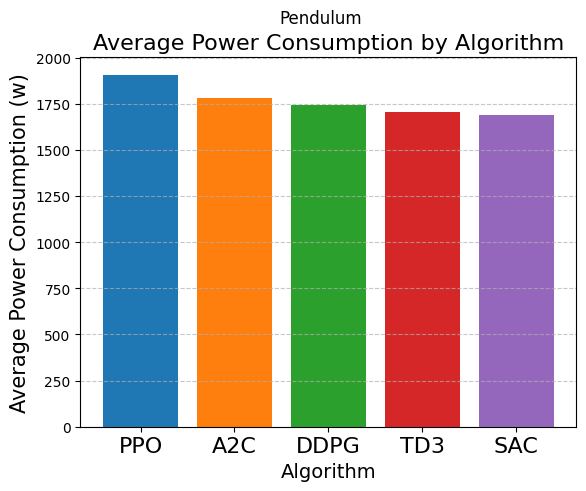

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("PENDULUM POWER EXPERIMENT.csv")
df['power_consumption'] = df['power_consumption'].replace(',', ' ')

ppo_rows = df[df["algorithm.__name__"] == "PPO"]
a2c_rows = df[df["algorithm.__name__"] == "A2C"]
ddpg_rows = df[df["algorithm.__name__"] == "DDPG"]
td3_rows = df[df["algorithm.__name__"] == "TD3"]
sac_rows = df[df["algorithm.__name__"] == "SAC"]

mean_power_consumption_ppo = ppo_rows["power_consumption"].mean()
mean_power_consumption_a2c = a2c_rows["power_consumption"].mean()
mean_power_consumption_ddpg = ddpg_rows["power_consumption"].mean()
mean_power_consumption_td3 = td3_rows["power_consumption"].mean()
mean_power_consumption_sac = sac_rows["power_consumption"].mean()

print("PPO:", mean_power_consumption_ppo)
print("A2C:", mean_power_consumption_a2c)
print("DDPG:", mean_power_consumption_ddpg)
print("TD3:", mean_power_consumption_td3)
print("SAC:", mean_power_consumption_sac)

labels = ['PPO', 'A2C', 'DDPG', 'TD3', 'SAC']
values = [mean_power_consumption_ppo, mean_power_consumption_a2c, mean_power_consumption_ddpg, mean_power_consumption_td3, mean_power_consumption_sac]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots()
ax.bar(labels, values, color=colors)
ax.set_title('Average Power Consumption by Algorithm', fontsize=16)
ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Average Power Consumption (w)', fontsize=15)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='x', labelsize=16)
fig.text(0.5, 0.98, 'Pendulum', fontsize=12, ha='center', va='top')


plt.savefig('Pendulum_average_power_plot.png')


plt.show()


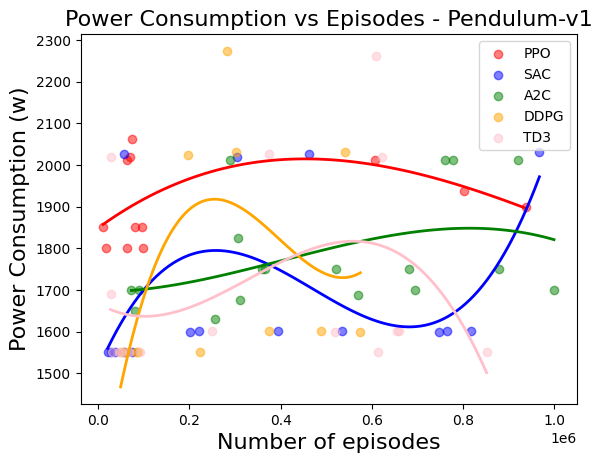

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("PENDULUM POWER EXPERIMENT.csv")
algorithms = ["PPO", "SAC", "A2C", "DDPG", "TD3"]

colors = ['red', 'blue', 'green', 'orange', 'pink']

fig, ax = plt.subplots()
for i, algo in enumerate(algorithms):
    algo_df = df[df['algorithm.__name__'] == algo]
    x = algo_df['number_of_episodes']
    y = algo_df['power_consumption']
    p = np.polyfit(x, y, 3) 
    f = np.poly1d(p)
    x_new = np.linspace(x.min(), x.max(), 100)
    y_new = f(x_new)
    ax.scatter(x, y, alpha=0.5, color=colors[i], label=algo)
    ax.plot(x_new, y_new, color=colors[i], linewidth=2)

ax.set_xlabel('Number of episodes', fontsize = 16)
ax.set_ylabel('Power Consumption (w)', fontsize = 16)
ax.set_title('Power Consumption vs Episodes - Pendulum-v1', fontsize = 16)

ax.legend()
plt.savefig('Pendulum_power_vs_episodes_plot.png')
plt.show() 

#plt.savefig('CartPole_power_vs_episodes_plot.png')

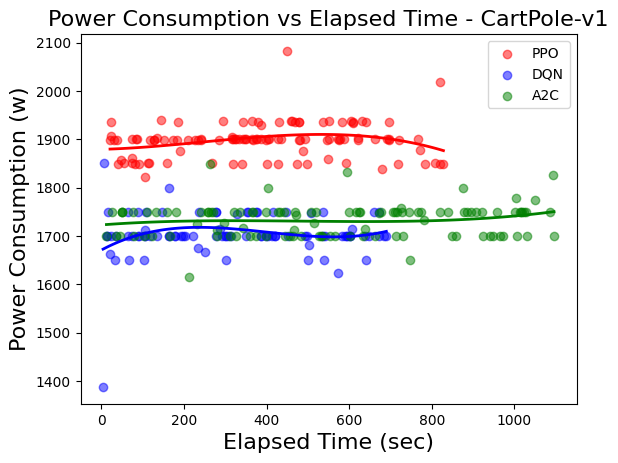

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Due to problems with the dataset these lines convert the data to numeric so that it can be processed
df = pd.read_csv("TESTING AGAIN CARTPOLE POWER EXPERIMENT.csv")

algorithms = ["PPO", "DQN", "A2C"]
colors = ['red', 'blue', 'green']
fig, ax = plt.subplots()
for i, algo in enumerate(algorithms):
    algo_df = df[df['algorithm.__name__'] == algo]
    x = algo_df['elapsed_time_sec']
    y = algo_df['power_consumption']
    p = np.polyfit(x, y, 3) # the numeric value here is the degree of polynomial so I can set it to 1 if I just want a straight line
    f = np.poly1d(p)
    x_new = np.linspace(x.min(), x.max(), 100)
    y_new = f(x_new)
    ax.scatter(x, y, alpha=0.5, color=colors[i], label=algo)
    ax.plot(x_new, y_new, color=colors[i], linewidth=2)
ax.set_xlabel('Elapsed Time (sec)', fontsize = 16)
ax.set_ylabel('Power Consumption (w)', fontsize = 16)
ax.set_title('Power Consumption vs Elapsed Time - CartPole-v1', fontsize = 16)

ax.legend()
#this line below should be commented out unless I want to save the plot I make
plt.savefig('CartPole_power_vs_time_plot.png')
#I need to make sure it is always above the "plt.show() otherwise there will be errors"
plt.show() 



In [50]:
#This code should take the mean average values for wattage at any given time and
#multiply them by the amount of seconds in the "training time" collumn of the csv file
# and then this value will be converted into kwh (killowat hours) which is a common way of measuring
#power usage


import pandas as pd

#The code is taking data from my main "ALL DATA" csv file which has a varied range of experiments from
#different environments, algorithms and episodes of training
df = pd.read_csv('ALL DATA.csv')

#here we create a dictionary with the average wattage values corresponding to the algorithm used
wattage_dict = {'PPO': 1874.7430625000002,
                'A2C': 1710.354527777778,
                'DDPG': 1583.4105,
                'TD3': 1578.6056964285713,
                'SAC': 1600.038625,
                'DQN': 1704.3960071839085}

# Here I create the collumns for the watt seconds and the killowat hours
#I am making it a new file in case I need to keep the ALL DATA file unneffected
df['training time * wattage'] = df.apply(lambda row: row['Training time'] * wattage_dict[row['Algorithm Name']] if row['Algorithm Name'] in wattage_dict else None, axis=1)
df['kilowatt hours'] = df['training time * wattage'] / (3600 * 1000)
df.to_csv('ALL DATA - with wattage and kWh.csv', index=False)
